# calculating LS and HS birth mass data

In [16]:
import pandas as pd
import numpy as np
slo_data=pd.read_csv('slo_data.txt',sep=' ')
rec_data=pd.read_csv('rec_data.txt',sep=' ')
data=pd.read_csv('data.txt',sep=' ')
slow_exp=np.loadtxt('slow_obs.txt')

#data and rec_data ['name','pmra','pmdec','gl','gb','p0','p1','pb','dl','m','merr','mc','e']
#slo_data ['m','merr']
del rec_data['p0']
del rec_data['p1']
del rec_data['pb']
rec_bns=rec_data.iloc[27:,:]

file=open('PSR_BNSmass_New.txt')
data=file.readlines()
with open('PSR.txt','w') as m:
    for line in data:
        m.write(' '.join(line.split()))
        m.write('\n')
data_psr_bns=pd.read_csv('PSR.txt',sep=' ',header=None,names=['name','m','merr','mc','mcerr','mt','mterr','p0','p1','pb','e'])
psr_rec=(pd.concat([data_psr_bns.iloc[0:-1,:],rec_bns.iloc[:,1:6].reset_index(drop=True)],axis=1)).reset_index(drop=True)

nswd_data=pd.read_excel('NSmass_precise.xlsx')
ex_dat=pd.read_csv('ex_dat.txt',sep=';',names=['nu','nam','pmra','pmdec','gl','gb','dl','nan'])
del ex_dat['nu']
del ex_dat['nan']
nswd_rec=(pd.concat([(nswd_data.iloc[:,:]),(ex_dat.iloc[:,:]).reset_index(drop=True)],axis=1)).reset_index(drop=True)
del nswd_rec['ref']
del nswd_rec['type']
del nswd_rec['nam']
nswd_recdat=nswd_rec.iloc[:-1,:]
nswd_slodat=nswd_rec.iloc[24:,:]

#pick up all recycled psr data
rec_data_al=np.zeros((35,3))
rec_data_al[0:24,0]=nswd_recdat['m']
rec_data_al[24:,0]=psr_rec['m']
rec_data_al[0:24,1]=nswd_recdat['merr']
rec_data_al[24:,1]=psr_rec['merr']
rec_data_al[0:24,2]=nswd_recdat['p0']
rec_data_al[24:,2]=psr_rec['p0']

def tauris_acc_m(p_birth):
    return 0.22*(1.4**(1/3))/(p_birth*1000)**(4/3)

acc_m_tau=np.zeros(len(rec_data_al))
acc_m_tau=tauris_acc_m(rec_data_al[:,2])
ns=5000
nu=len(rec_data_al)
rec_data_exp=np.zeros(ns*len(rec_data_al))

for i in range(len(rec_data_al)):
    rec_data_exp[i*5000:(i+1)*5000]=np.random.normal(rec_data_al[i,0],rec_data_al[i,1],ns) - acc_m_tau[i]

rec_slow_oran_cor=np.zeros((ns*nu)+13*ns)
rec_slow_oran_cor[0:(ns*nu)]=rec_data_exp
rec_slow_oran_cor[(ns*nu):((ns*nu)+13*ns)]=slow_exp    
#np.savetxt('rec_slow_oran_cor.txt',rec_slow_oran_cor)    

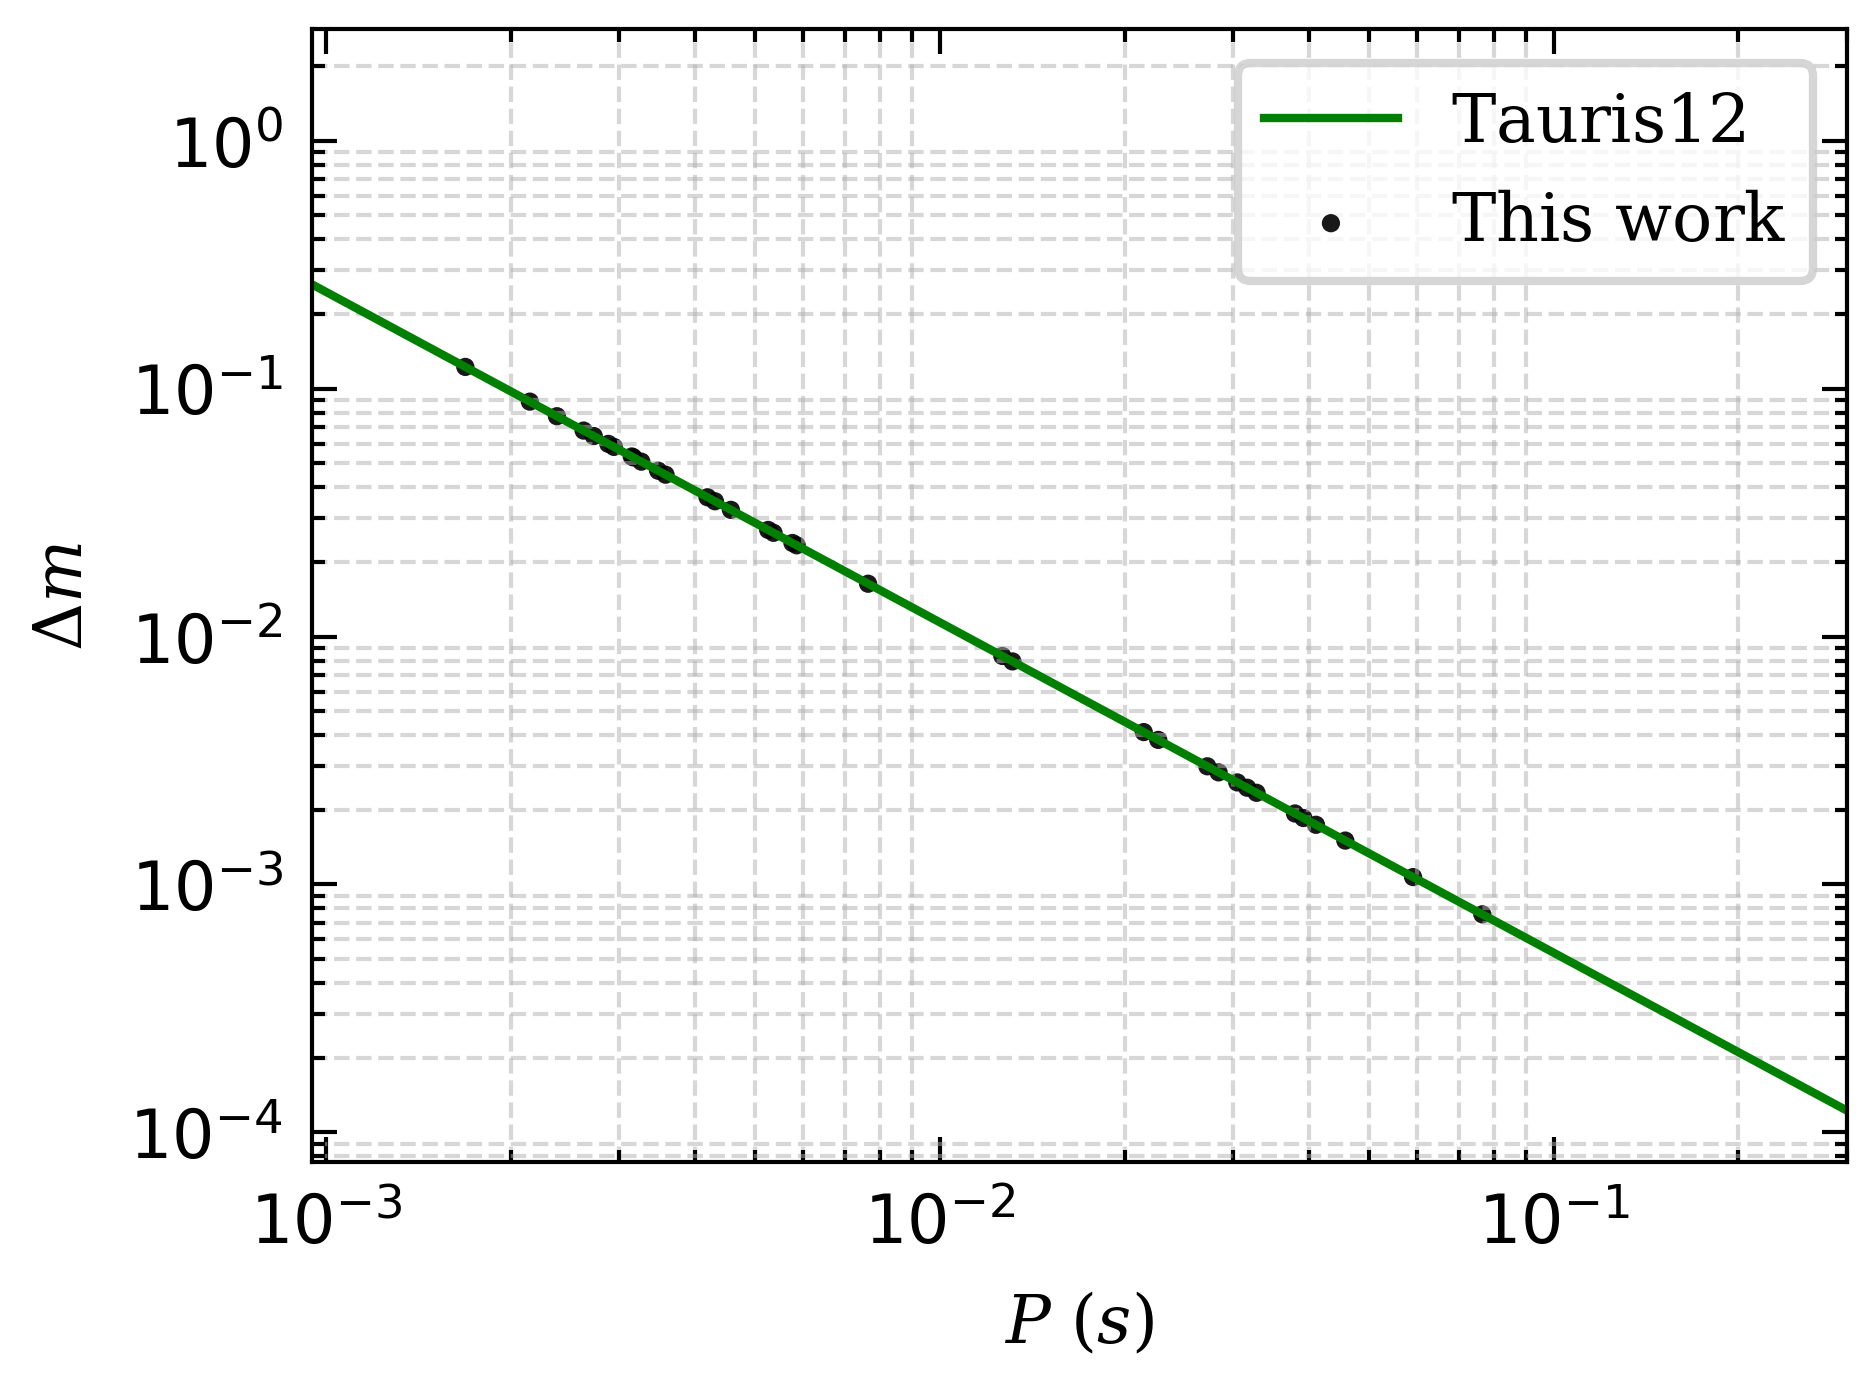

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')

plt.figure()
plt.grid(b=True, which='minor',linestyle='--',alpha=0.5)
#plt.plot(xx,li_acc_m(xx),c='k',ls='--',lw=0.4,label=r'$\rm{Fit}$')

plt.scatter(rec_data_al[:,2],acc_m_tau,s=4.8,lw=1,facecolor='k',edgecolors='none',alpha=0.9,label=r'$\rm{This\,\, work}$')
#plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='none',edgecolors='k',label=r'$\rm{Li21}$')
#plt.errorbar(xx,acc_zhangcm(xx*1000,0.295,-0.55),((acc_zhangcm(xx*1000,0.295,-0.55)-tauris_acc_m(xx*1000,0.22))*0.5),c='grey',lw=0.1)
plt.plot(xx,tauris_acc_m(xx),c='green',label=r'$\rm{Tauris12}$')

plt.yscale('log')
plt.xlim(0.00095,0.3)
#plt.ylim(0,8*10**(-1))
plt.xlabel(r'$P\,\,(s)$')
plt.ylabel(r'$\Delta m$')
plt.legend(frameon=True)
plt.xscale('log')
plt.show()

In [4]:
import pandas as pd
import numpy as np
slo_data=pd.read_csv('slo_data.txt',sep=' ')
rec_data=pd.read_csv('rec_data.txt',sep=' ')
data=pd.read_csv('data.txt',sep=' ')
slow_exp=np.loadtxt('slow_obs.txt')

#data and rec_data ['name','pmra','pmdec','gl','gb','p0','p1','pb','dl','m','merr','mc','e']
#slo_data ['m','merr']
del rec_data['p0']
del rec_data['p1']
del rec_data['pb']
rec_bns=rec_data.iloc[27:,:]

file=open('PSR_BNSmass_New.txt')
data=file.readlines()
with open('PSR.txt','w') as m:
    for line in data:
        m.write(' '.join(line.split()))
        m.write('\n')
data_psr_bns=pd.read_csv('PSR.txt',sep=' ',header=None,names=['name','m','merr','mc','mcerr','mt','mterr','p0','p1','pb','e'])
psr_rec=(pd.concat([data_psr_bns.iloc[0:-1,:],rec_bns.iloc[:,1:6].reset_index(drop=True)],axis=1)).reset_index(drop=True)

nswd_data=pd.read_excel('NSmass_precise.xlsx')
ex_dat=pd.read_csv('ex_dat.txt',sep=';',names=['nu','nam','pmra','pmdec','gl','gb','dl','nan'])
del ex_dat['nu']
del ex_dat['nan']
nswd_rec=(pd.concat([(nswd_data.iloc[:,:]),(ex_dat.iloc[:,:]).reset_index(drop=True)],axis=1)).reset_index(drop=True)
del nswd_rec['ref']
del nswd_rec['type']
del nswd_rec['nam']
nswd_recdat=nswd_rec.iloc[:-1,:]
nswd_slodat=nswd_rec.iloc[24:,:]

#pick up all recycled psr data
rec_data_al=np.zeros((35,3))
rec_data_al[0:24,0]=nswd_recdat['m']
rec_data_al[24:,0]=psr_rec['m']
rec_data_al[0:24,1]=nswd_recdat['merr']
rec_data_al[24:,1]=psr_rec['merr']
rec_data_al[0:24,2]=nswd_recdat['p0']
rec_data_al[24:,2]=psr_rec['p0']

def tauris_acc_m(p_birth):
    #using the equation in https://arxiv.org/abs/1206.1862  Eq.14
    return 0.22*(1.4**(1/3))/(p_birth*1000)**(4/3)

def li_acc_m(p_birth):
    #we fit the open circle in Figure 4. in arXiv:2108.02554v1, and obtain parameters: a = 0.28, b=-0.5.
    a=0.28
    b=-0.5
    return a*(p_birth*1000)**b

def errf(p_birth):
    #the 1-sigma error is one-third of the difference between Tauris12  and the best fitted value
    return (li_acc_m(p_birth)-tauris_acc_m(p_birth))*0.3

ns=5000
nu=len(rec_data_al)
delta_m_li=np.zeros(nu*ns)
rec_data_exp=np.zeros(nu*ns)
for i in range(len(rec_data_al)):
    delta_m_li[i*5000:(i+1)*5000]=np.random.normal(li_acc_m(rec_data_al[i,2]),errf(rec_data_al[i,2]),ns)
    rec_data_exp[i*5000:(i+1)*5000]=np.random.normal(rec_data_al[i,0],rec_data_al[i,1],ns)-delta_m_li[i*5000:(i+1)*5000]

rec_slow_oran_cor=np.zeros((ns*nu)+13*ns)
rec_slow_oran_cor[0:(ns*nu)]=rec_data_exp
rec_slow_oran_cor[(ns*nu):((ns*nu)+13*ns)]=slow_exp    
np.savetxt('cal_Li21_p0.txt',rec_slow_oran_cor)    

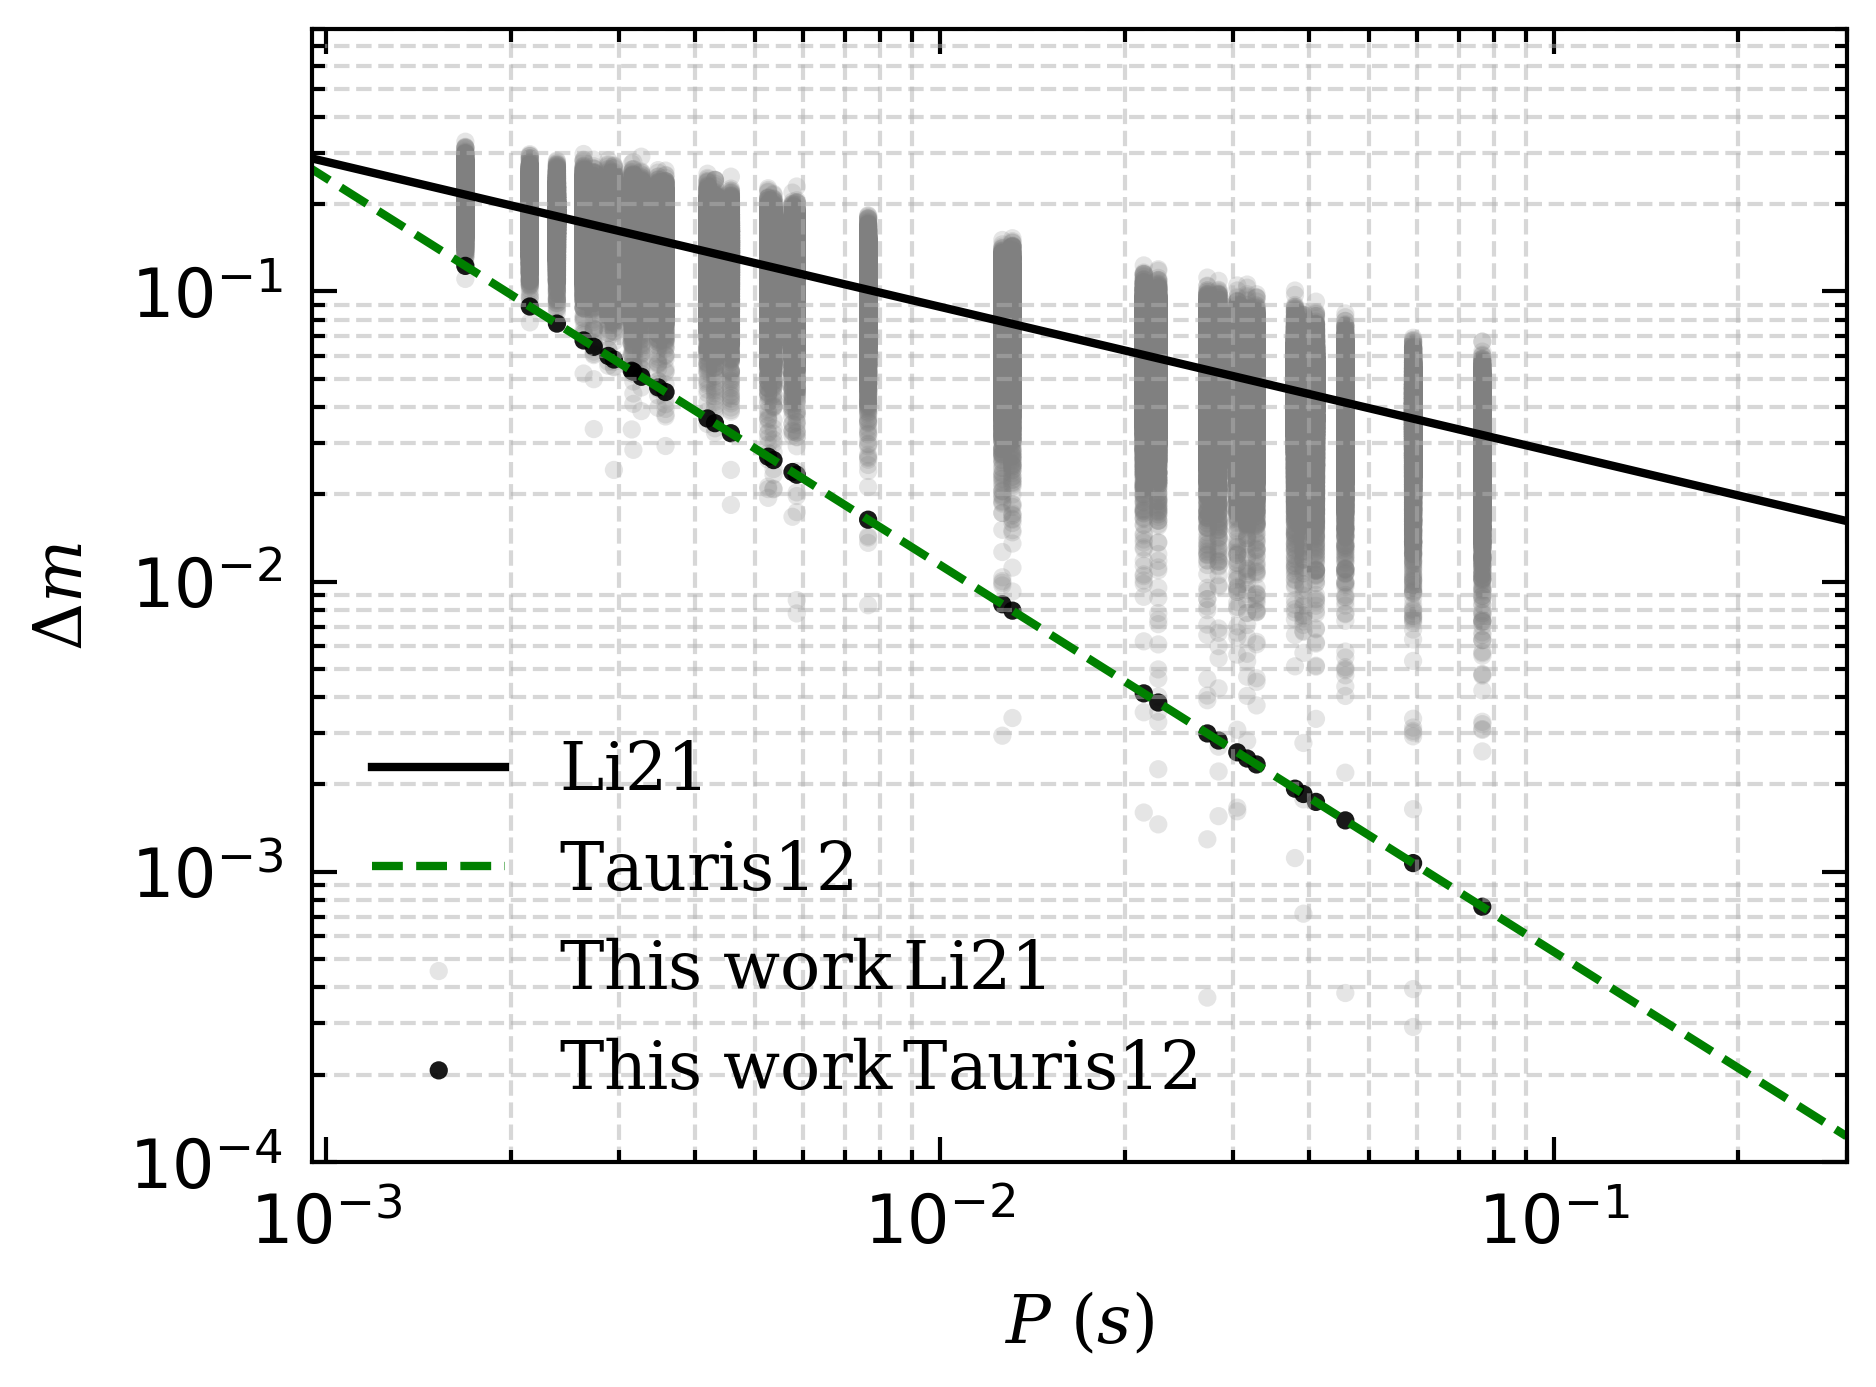

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
xx=np.linspace(0.00023,0.3,1000)
rec_data_p0=np.zeros(nu*ns)
for i in range(nu):
    rec_data_p0[i*5000:(i+1)*5000]=rec_data_al[i,2]*np.ones(5000)
    
plt.grid(b=True, which='minor',linestyle='--',alpha=0.5)
plt.scatter(rec_data_p0,delta_m_li,s=4.8,lw=1,facecolor='grey',edgecolors='none',alpha=0.2,label=r'$\rm{This\,\, work\, Li21}$')
plt.plot(xx,li_acc_m(xx),c='k',label=r'$\rm{Li21}$')
plt.plot(xx,tauris_acc_m(xx),c='green',label=r'$\rm{Tauris12}$')
plt.scatter(rec_data_al[:,2],acc_m_tau,s=4.8,lw=1,facecolor='k',edgecolors='none',alpha=0.9,label=r'$\rm{This\,\, work\, Tauris12 }$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.00095,0.3)
plt.ylim(10**(-4),0.8)
plt.xlabel(r'$P\,\,(s)$')
plt.ylabel(r'$\Delta m$')
plt.legend()